# Template 

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [2]:
import pandas as pd
from collections import Counter
from IPython.display import display

In [3]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v

pandas 1.0.5
2020-07-17 

CPython 3.7.8
IPython 7.16.1

compiler   : GCC 8.3.0
system     : Linux
release    : 4.19.76-linuxkit
machine    : x86_64
processor  : 
CPU cores  : 16
interpreter: 64bit
Git hash   : 05ceee53ab9838273741b8524909dc62fbc64eb9
Git repo   : https://github.com/ysraell/aceleradev_private.git
Git branch : master


In [4]:
import scipy
print(scipy.__version__)

1.5.1


In [5]:
results_csv_name = 'Results_RC1.csv'
df_laoded = pd.read_csv(results_csv_name)
df_laoded = df_laoded.loc[:, ~df_laoded.columns.str.contains('^Unnamed')]
n_components_list = [10, 20, 30, 50, 80, 100, 120, 150]
df_laoded = df_laoded.query('n_components in {}'.format(n_components_list))
df_laoded['T_True'] = df_laoded[['P1_True','P2_True','P3_True']].sum(1)
df_laoded['T23_True'] = df_laoded[['P2_True','P3_True']].sum(1)

In [6]:
df_laoded['P23pp'] = df_laoded[['P2pp','P3pp']].mean(1)

In [7]:
len(df_laoded)

287

In [19]:
pd.set_option('display.max_rows', 500)
df_laoded.sort_values(by='T23_True', ascending=False).head(50)

,pre_proc,redux_func,n_components,dist,t,P1pp,P1_True,P1_len,P2pp,P2_True,P2_len,P3pp,P3_True,P3_len,T_True,T23_True
238,escalaropt_std,_NMF,80,BrayCurtis,1930.203220,0.003597,2,556,0.285714,162,567,0.285714,76,266,240,238
211,escalaropt_missings,_FastICA,50,BrayCurtis,1284.093942,0.010791,6,556,0.273369,155,567,0.304511,81,266,242,236
304,escalaropt_entropy,_FastICA,50,BrayCurtis,1249.082738,0.008993,5,556,0.268078,152,567,0.300752,80,266,237,232
166,Nothing,_NMF,80,BrayCurtis,1515.776134,0.005396,3,556,0.282187,160,567,0.270677,72,266,235,232
29,escalaropt_missings,_NMF,50,np_cossine,961.240483,0.003597,2,556,0.280423,159,567,0.266917,71,266,232,230
25,escalaropt_missings,_NMF,50,Manhattan,1216.803251,0.003597,2,556,0.280423,159,567,0.266917,71,266,232,230
28,escalaropt_missings,_NMF,50,BrayCurtis,963.997076,0.003597,2,556,0.280423,159,567,0.266917,71,266,232,230
183,escalaropt_std,_NMF,50,BrayCurtis,1331.378079,0.003597,2,556,0.280423,159,567,0.266917,71,266,232,230
229,escalaropt_std,_FastICA,50,BrayCurtis,1536.553363,0.010791,6,556,0.269841,153,567,0.289474,77,266,236,230
27,escalaropt_missings,_NMF,50,Camberra,968.322599,0.003597,2,556,0.280423,159,567,0.266917,71,266,232,230


In [20]:
df_laoded.sort_values(by='T_True', ascending=False).head(50)

,pre_proc,redux_func,n_components,dist,t,P1pp,P1_True,P1_len,P2pp,P2_True,P2_len,P3pp,P3_True,P3_len,T_True,T23_True
211,escalaropt_missings,_FastICA,50,BrayCurtis,1284.093942,0.010791,6,556,0.273369,155,567,0.304511,81,266,242,236
238,escalaropt_std,_NMF,80,BrayCurtis,1930.203220,0.003597,2,556,0.285714,162,567,0.285714,76,266,240,238
304,escalaropt_entropy,_FastICA,50,BrayCurtis,1249.082738,0.008993,5,556,0.268078,152,567,0.300752,80,266,237,232
229,escalaropt_std,_FastICA,50,BrayCurtis,1536.553363,0.010791,6,556,0.269841,153,567,0.289474,77,266,236,230
324,escalaropt_entropy,_FastICA,50,BrayCurtis,1389.643531,0.010791,6,556,0.268078,152,567,0.289474,77,266,235,229
275,Nothing,_FastICA,50,BrayCurtis,1245.714558,0.010791,6,556,0.266314,151,567,0.293233,78,266,235,229
166,Nothing,_NMF,80,BrayCurtis,1515.776134,0.005396,3,556,0.282187,160,567,0.270677,72,266,235,232
237,escalaropt_std,_NMF,50,BrayCurtis,1610.450286,0.003597,2,556,0.280423,159,567,0.266917,71,266,232,230
25,escalaropt_missings,_NMF,50,Manhattan,1216.803251,0.003597,2,556,0.280423,159,567,0.266917,71,266,232,230
198,escalaropt_entropy,_NMF,50,BrayCurtis,1328.340646,0.003597,2,556,0.280423,159,567,0.266917,71,266,232,230


In [ ]:
([])

In [10]:
results_csv_name1 = 'Results_RC1.csv'
results_csv_name2 = 'Results_RC2.csv'
df_laoded1 = pd.read_csv(results_csv_name1)
df_laoded2 = pd.read_csv(results_csv_name2)

In [11]:
df_laoded = pd.concat([df_laoded2, df_laoded1]).drop_duplicates()

In [13]:
df_laoded = df_laoded.loc[:, ~df_laoded.columns.str.contains('^Unnamed')]
df_laoded['T_True'] = df_laoded[['P1_True','P2_True','P3_True']].sum(1)
df_laoded['T23_True'] = df_laoded[['P2_True','P3_True']].sum(1)
df_laoded['P23pp'] = df_laoded[['P2pp','P3pp']].mean(1)

In [8]:
df_laoded.to_csv(results_csv_name1, index=False)

df_laoded.to_csv(results_csv_name2, index=False)

results_csv_name_ = 'Results_17jul20.csv'
df_laoded.to_csv(results_csv_name_, index=False)

<AxesSubplot:>

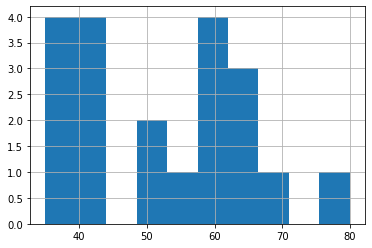

In [25]:
pd.set_option('display.max_rows', 500)
df_laoded.sort_values(by='P23pp', ascending=False).head(20).n_components.hist()

In [15]:

df_laoded.query('n_components == 55')

,pre_proc,redux_func,n_components,dist,t,P1pp,P1_True,P1_len,P2pp,P2_True,P2_len,P3pp,P3_True,P3_len,T_True,T23_True,P23pp
162,Nothing,_NMF,55,BrayCurtis,1367.972219,0.003597,2,556,0.264550,150,567,0.248120,66,266,218,216,0.256335
173,escalaropt_missings,_NMF,55,BrayCurtis,1369.937434,0.001799,1,556,0.266314,151,567,0.274436,73,266,225,224,0.270375
184,escalaropt_std,_NMF,55,BrayCurtis,1371.699432,0.007194,4,556,0.252205,143,567,0.251880,67,266,214,210,0.252042
199,escalaropt_entropy,_NMF,55,BrayCurtis,1373.309309,0.005396,3,556,0.255732,145,567,0.255639,68,266,216,213,0.255686
276,Nothing,_FastICA,55,BrayCurtis,1275.135193,0.000000,0,556,0.255732,145,567,0.289474,77,266,222,222,0.272603
287,escalaropt_missings,_FastICA,55,BrayCurtis,1278.448064,0.000000,0,556,0.259259,147,567,0.308271,82,266,229,229,0.283765
294,escalaropt_std,_FastICA,55,BrayCurtis,1277.560295,0.000000,0,556,0.261023,148,567,0.289474,77,266,225,225,0.275248
305,escalaropt_entropy,_FastICA,55,BrayCurtis,1277.742540,0.000000,0,556,0.259259,147,567,0.300752,80,266,227,227,0.280006


In [26]:
df_laoded.t.describe()

count      353.000000
mean      1420.212770
std       1641.361897
min        960.419138
25%       1039.487786
50%       1216.803251
75%       1510.978056
max      31364.442675
Name: t, dtype: float64